In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_files
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import csv

In [2]:
data_1 = pd.read_excel('time_stamp_data.xlsx')

In [3]:
data_1 = data_1[25:544]

In [4]:
data_1.tail()

,Time Stamp,PM_US Post
539,2010-01-23 11:00:00,15.0
540,2010-01-23 12:00:00,19.0
541,2010-01-23 13:00:00,17.0
542,2010-01-23 14:00:00,17.0
543,2010-01-23 15:00:00,22.0


In [5]:
data_1 = data_1.set_index('Time Stamp')

In [6]:
data_1.head()

,PM_US Post
Time Stamp,
2010-01-02 01:00:00,159.0
2010-01-02 02:00:00,181.0
2010-01-02 03:00:00,138.0
2010-01-02 04:00:00,109.0
2010-01-02 05:00:00,105.0


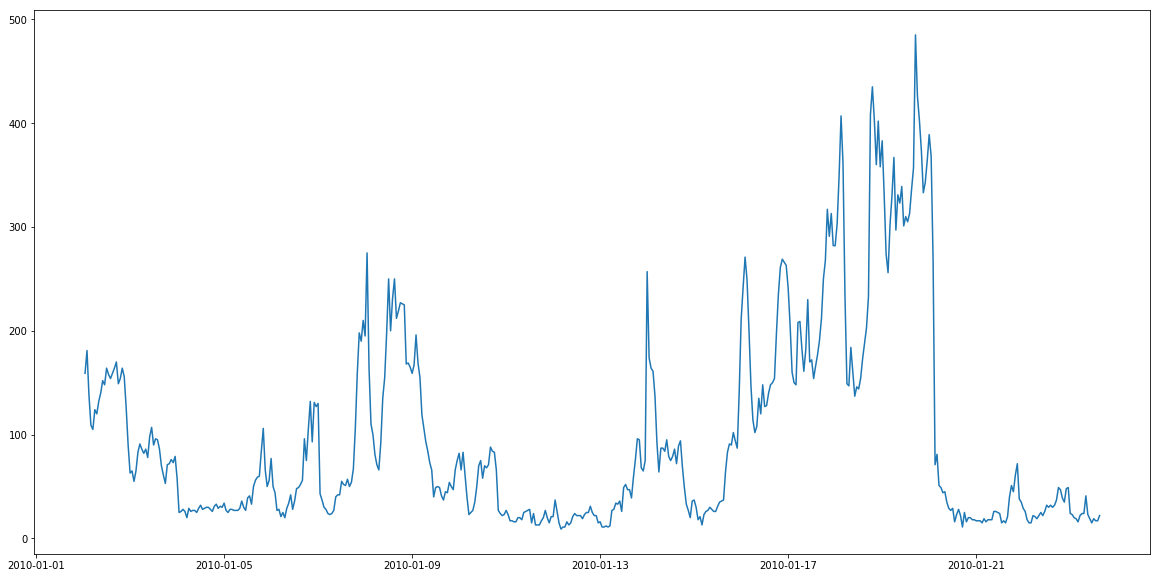

In [7]:
plt.figure(figsize=(20,10))
plt.plot(data_1)

c:\users\rakesh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


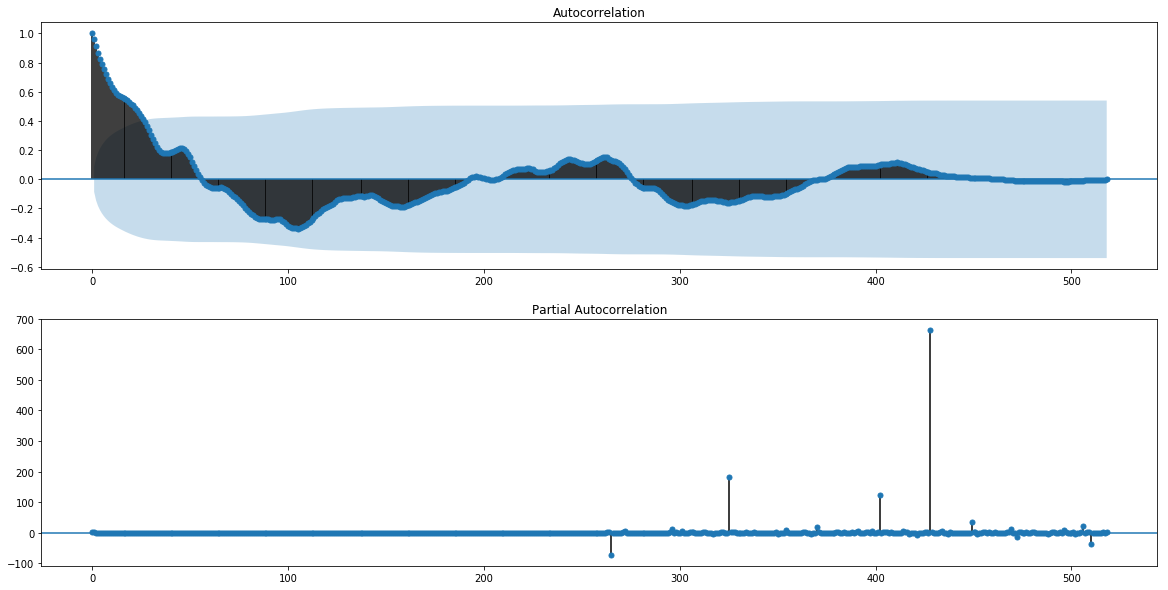

In [8]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = data_1
pyplot.figure(figsize=(20,10))
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

In [106]:
data_2 = data_1

Implies series is not stationary

### Steps for ARIMA implementation
1. Load the data: The first step for model building is of course to load the dataset

2. Preprocessing: Depending on the dataset, the steps of preprocessing will be defined. This will include creating timestamps, converting the dtype of date/time column, making the series univariate, etc.

3. Make series stationary: In order to satisfy the assumption, it is necessary to make the series stationary. This would include checking the stationarity of the series and performing required transformations

4. Determine d value: For making the series stationary, the number of times the difference operation was performed will be taken as the d value

5. Create ACF and PACF plots: This is the most important step in ARIMA implementation. ACF PACF plots are used to determine the input parameters for our ARIMA model

6. Determine the p and q values: Read the values of p and q from the plots in the previous step

7. Fit ARIMA model: Using the processed data and parameter values we calculated from the previous steps, fit the ARIMA model

8. Predict values on validation set: Predict the future values

9. Calculate RMSE: To check the performance of the model, check the RMSE value using the predictions and actual values on the validation set

with Auto Arima we can skip from step 3 to 6

## Auto Arima

In [108]:
#divide into train and validation set
train = data_2[:int(0.7*(len(data_2)))]
valid = data_2[int(0.7*(len(data_2))):]

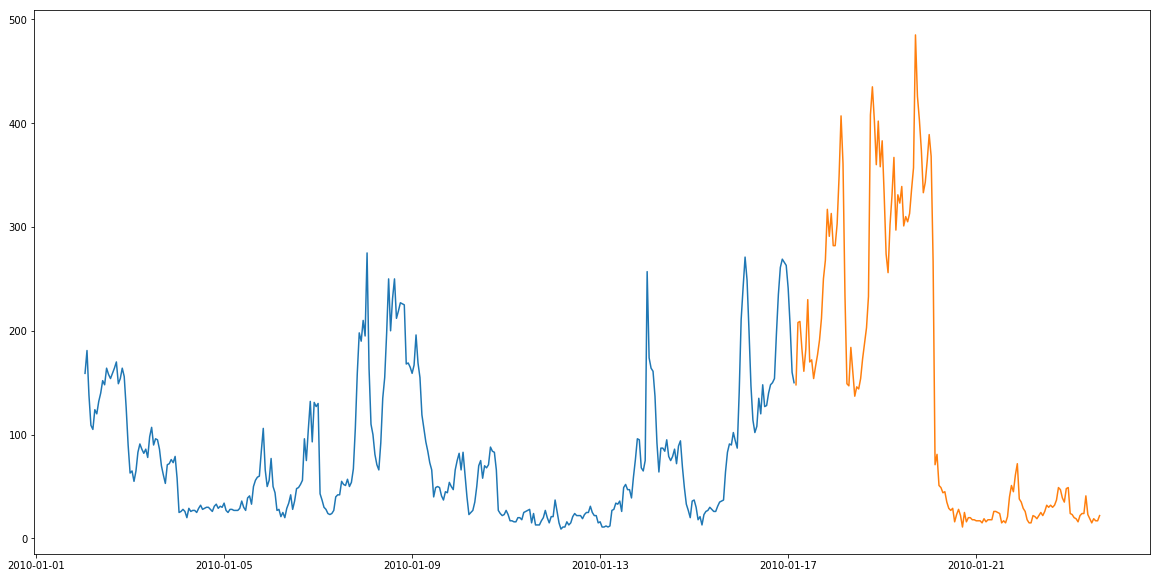

In [109]:
plt.figure(figsize=(20,10))
plt.plot(train)
plt.plot(valid)

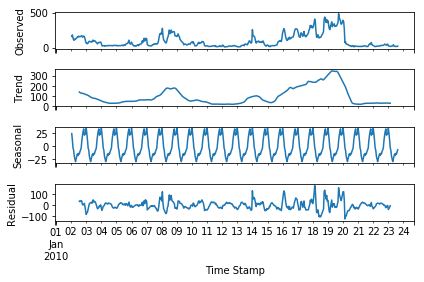

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = data_2
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

In [111]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(data_2, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4789.642, BIC=4810.775, Fit time=1.118 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5162.297, BIC=5170.750, Fit time=0.033 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=4997.176, BIC=5014.082, Fit time=0.697 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4788.012, BIC=4804.918, Fit time=1.939 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4784.296, BIC=4805.428, Fit time=1.077 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=4997.078, BIC=5013.984, Fit time=0.874 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=4786.118, BIC=4811.477, Fit time=8.375 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=5149.477, BIC=5162.157, Fit time=0.228 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=4784.916, BIC=4814.502, Fit time=9.724 seconds
Fit ARIMA: order=(1, 1, 1) s

In [148]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(data_2, start_p=1, start_q=1,
                           max_p=3, max_q=3,
                           start_P=0, seasonal=False,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 2, 1); AIC=4855.557, BIC=4872.549, Fit time=0.170 seconds
Fit ARIMA: order=(0, 2, 0); AIC=5138.378, BIC=5146.874, Fit time=0.005 seconds
Fit ARIMA: order=(1, 2, 0); AIC=5032.102, BIC=5044.847, Fit time=0.025 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4863.248, BIC=4875.993, Fit time=0.103 seconds


c:\users\rakesh\anaconda3\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
c:\users\rakesh\anaconda3\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
c:\users\rakesh\anaconda3\envs\tensorflow\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`

Fit ARIMA: order=(2, 2, 1); AIC=4857.536, BIC=4878.776, Fit time=0.274 seconds
Fit ARIMA: order=(1, 2, 2); AIC=4865.256, BIC=4886.496, Fit time=0.442 seconds
Fit ARIMA: order=(2, 2, 2); AIC=4852.057, BIC=4877.546, Fit time=0.635 seconds
Fit ARIMA: order=(3, 2, 2); AIC=4853.451, BIC=4883.187, Fit time=0.276 seconds
Fit ARIMA: order=(2, 2, 3); AIC=4852.025, BIC=4881.761, Fit time=0.495 seconds
Fit ARIMA: order=(1, 2, 3); AIC=4854.767, BIC=4880.255, Fit time=0.448 seconds
Fit ARIMA: order=(3, 2, 3); AIC=4851.071, BIC=4885.055, Fit time=0.651 seconds
Total fit time: 3.527 seconds
4851.071016154445


## ARIMA

### Moving Average

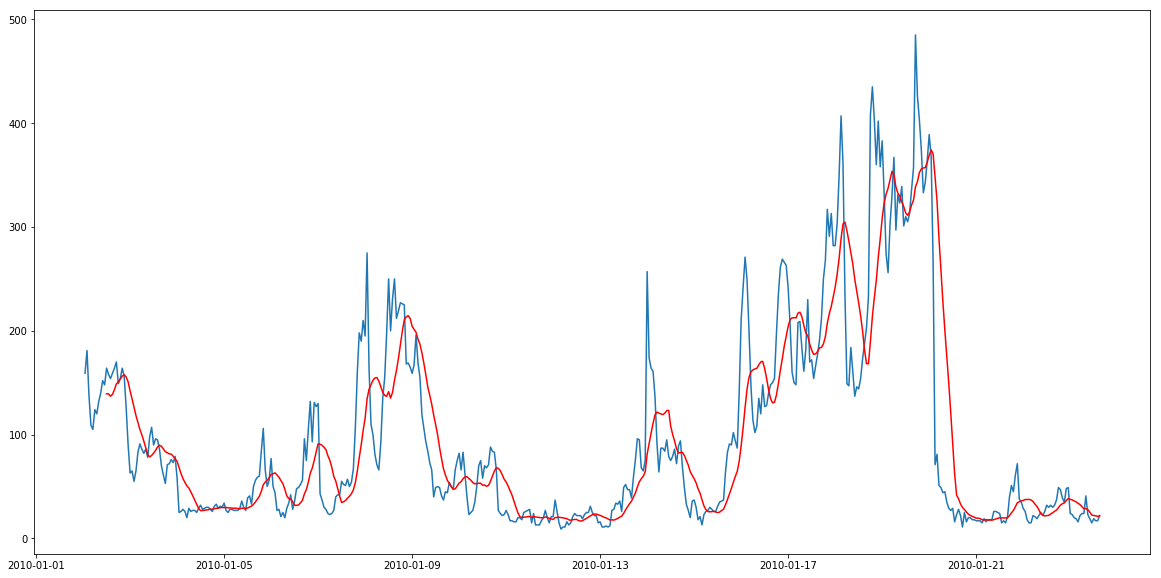

In [126]:
moving_avg = data_2.rolling(12).mean()

plt.figure(figsize=(20,10))
plt.plot(data_2)
plt.plot(moving_avg, color='red')

In [127]:
data_3 = data_2 - moving_avg
data_3.head(12)

,PM_US Post
Time Stamp,
2010-01-02 01:00:00,NaN
2010-01-02 02:00:00,NaN
2010-01-02 03:00:00,NaN
2010-01-02 04:00:00,NaN
2010-01-02 05:00:00,NaN
2010-01-02 06:00:00,NaN
2010-01-02 07:00:00,NaN
2010-01-02 08:00:00,NaN
2010-01-02 09:00:00,NaN


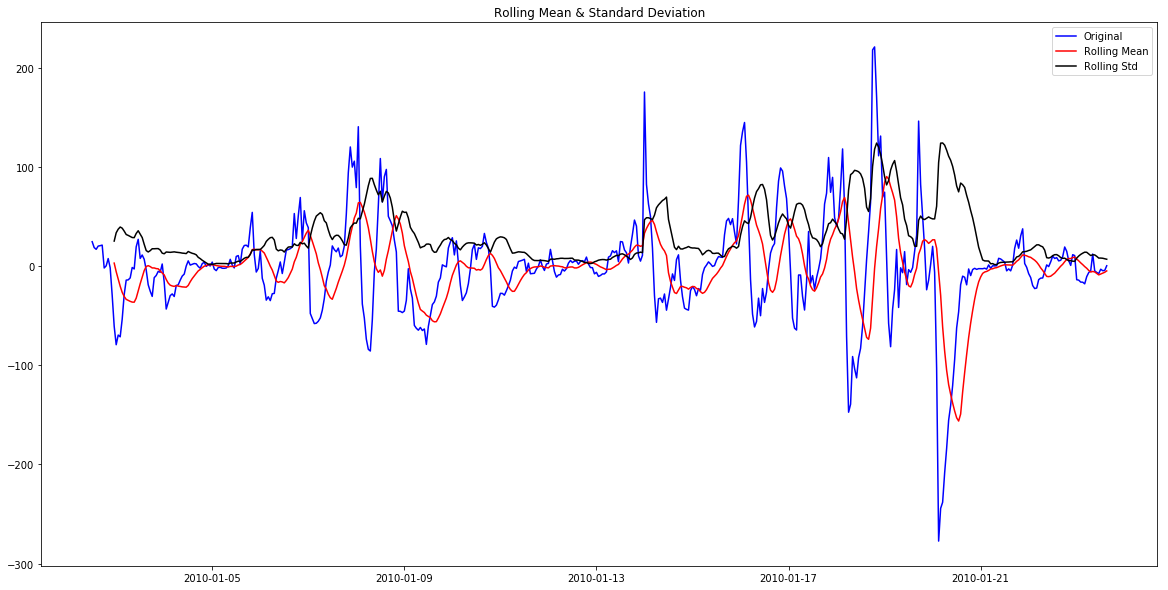

In [128]:
data_3.dropna(inplace=True)

#Determing rolling statistics
rolmean = data_3.rolling(12).mean()
rolstd = data_3.rolling(12).std()

#Plot rolling statistics:
plt.figure(figsize=(20,10))
orig = plt.plot(data_3, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The trend has reduced considerably

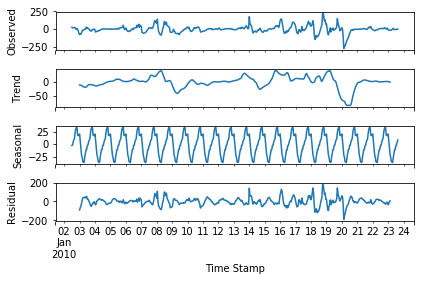

In [138]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = data_3
result = seasonal_decompose(series, model='additive')
result.plot()
pyplot.show()

c:\users\rakesh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
c:\users\rakesh\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


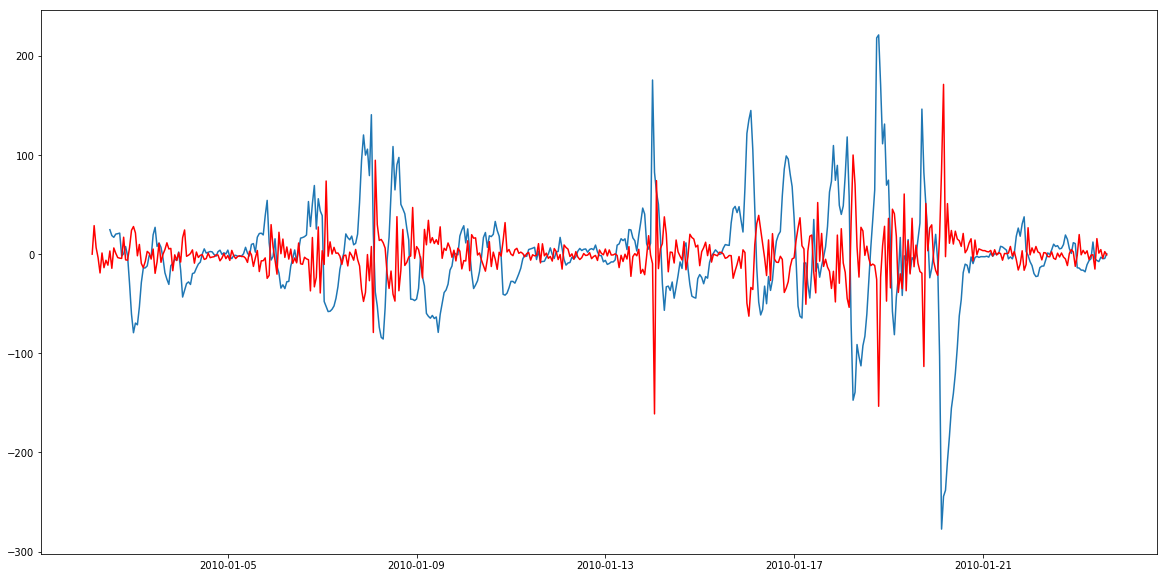

In [149]:
model = ARIMA(data_2, order=(3, 2, 3))  
results_ARIMA = model.fit(disp=1)  
plt.figure(figsize=(20,10))
plt.plot(data_3)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-data_3)**2))